In [2]:
import numpy
import tensorflow as tf
import os

In [3]:
tf.test.gpu_device_name()

''

In [4]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images
from sklearn.model_selection import train_test_split
from glob import glob
from tqdm import tqdm

In [5]:
f = open("../input/video-classification/ucfTrainTestlist/ucfTrainTestlist/trainlist01.txt", "r")
temp = f.read()
videos = temp.split('\n')

# creating a dataframe having video names
train = pd.DataFrame()
train['video_name'] = videos
train = train[:-1]
train.head()

,video_name
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c01.avi 1
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c02.avi 1
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c03.avi 1
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c04.avi 1
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c05.avi 1


In [6]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML, display_html 

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))



df_csv = pd.read_csv('../input/video-classification/ucfTrainTestlist/ucfTrainTestlist/classInd1.txt')

df1_styler = df_csv[0:25].style.set_table_attributes("style='display:inline'")
df2_styler = df_csv[26:51].style.set_table_attributes("style='display:inline'")
df3_styler = df_csv[52:76].style.set_table_attributes("style='display:inline'")
df4_styler = df_csv[77:101].style.set_table_attributes("style='display:inline'")

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_(), raw=True)




,Classes
0,ApplyEyeMakeup
1,ApplyLipstick
2,Archery
3,BabyCrawling
4,BalanceBeam
5,BandMarching
6,BaseballPitch
7,Basketball
8,BasketballDunk
9,BenchPress


In [7]:
f = open("../input/video-classification/ucfTrainTestlist/ucfTrainTestlist/testlist01.txt", "r")
temp = f.read()
videos = temp.split('\n')

# creating a dataframe having video names
test = pd.DataFrame()
test['video_name'] = videos
test = test[:-1]
test.head()

,video_name
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02.avi
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c03.avi
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c04.avi
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c05.avi


In [8]:
# creating tags for training videos
train_video_tag = []
for i in range(train.shape[0]):
    train_video_tag.append(train['video_name'][i].split('/')[0])
    
train['tag'] = train_video_tag

# creating tags for test videos
test_video_tag = []
for i in range(test.shape[0]):
    test_video_tag.append(test['video_name'][i].split('/')[0])
    
test['tag'] = test_video_tag

In [9]:
train

,video_name,tag
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c01.avi 1,ApplyEyeMakeup
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c02.avi 1,ApplyEyeMakeup
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c03.avi 1,ApplyEyeMakeup
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c04.avi 1,ApplyEyeMakeup
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c05.avi 1,ApplyEyeMakeup
...,...,...
9532,YoYo/v_YoYo_g25_c01.avi 101,YoYo
9533,YoYo/v_YoYo_g25_c02.avi 101,YoYo
9534,YoYo/v_YoYo_g25_c03.avi 101,YoYo
9535,YoYo/v_YoYo_g25_c04.avi 101,YoYo


In [10]:
test

,video_name,tag
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi,ApplyEyeMakeup
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02.avi,ApplyEyeMakeup
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c03.avi,ApplyEyeMakeup
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c04.avi,ApplyEyeMakeup
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c05.avi,ApplyEyeMakeup
...,...,...
3778,YoYo/v_YoYo_g06_c04.avi,YoYo
3779,YoYo/v_YoYo_g07_c01.avi,YoYo
3780,YoYo/v_YoYo_g07_c02.avi,YoYo
3781,YoYo/v_YoYo_g07_c03.avi,YoYo


In [11]:
os.mkdir('/kaggle/working/train01/')

In [12]:
for i in tqdm(range(train.shape[0])):
    count = 0
    videoFile = train['video_name'][i]
    cap = cv2.VideoCapture('../input/video-classification/Videos/Videos/'+videoFile.split(' ')[0].split('/')[1])   # capturing the video from the given path
    frameRate = cap.get(5) #frame rate
    x=1
    while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
            # storing the frames in a new folder named train_1
            filename ='./train01/' + videoFile.split('/')[1].split(' ')[0] +"_frame%d.jpg" % count;count+=1
            cv2.imwrite(filename, frame)
    cap.release()

100%|██████████| 9537/9537 [12:09<00:00, 13.07it/s]


In [13]:
train.shape[0]

9537

In [14]:
# getting the names of all the images
images = glob("./train01/*.jpg")
train_image = []
train_class = []
for i in tqdm(range(len(images))):
    # creating the image name
    train_image.append(images[i].split('/')[2])
    # creating the class of image
    train_class.append(images[i].split('/')[2].split('_')[1])
    
# storing the images and their class in a dataframe
train_data = pd.DataFrame()
train_data['image'] = train_image
train_data['class'] = train_class

# converting the dataframe into csv file 
train_data.to_csv('./train_new.csv',header=True, index=False)

100%|██████████| 73844/73844 [00:00<00:00, 489056.98it/s]


In [15]:
import keras
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [16]:
train = pd.read_csv('./train_new.csv')
train.head()

,image,class
0,v_Skiing_g21_c04.avi_frame3.jpg,Skiing
1,v_Swing_g12_c03.avi_frame2.jpg,Swing
2,v_SkateBoarding_g19_c03.avi_frame3.jpg,SkateBoarding
3,v_Punch_g25_c02.avi_frame4.jpg,Punch
4,v_MoppingFloor_g23_c01.avi_frame2.jpg,MoppingFloor


In [15]:
train_image = []

# for loop to read and store frames
for i in tqdm(range(27000)):
    # loading the image and keeping the target size as (224,224,3)
    img = image.load_img('./train01/'+train['image'][i], target_size=(112,112,1))
    # converting it to array
    img = image.img_to_array(img)
    # normalizing the pixel value
    img = img/255
    # appending the image to the train_image list
    train_image.append(img)
    
# converting the list to numpy array
X = np.array(train_image)

# shape of the array
X.shape

100%|██████████| 27000/27000 [00:40<00:00, 673.30it/s]


(27000, 112, 112, 3)

In [17]:
pip install img2vec_pytorch 

Note: you may need to restart the kernel to use updated packages.


In [18]:
from img2vec_pytorch import Img2Vec
from PIL import Image

In [38]:
img2vec = Img2Vec(model = 'vgg-11')
train_image = np.zeros((train.shape[0], 512))

for i in tqdm(range(train.shape[0])):
    # loading the image and keeping the target size as (224,224,3)
    #img = image.load_img('./train01/'+train['image'][i], target_size=(112,112,1))
    image_read = Image.open('./train01/'+train['image'][i])
    image_all = img2vec.get_vec(image_read,tensor=True)
    image_all = image_all.flatten().numpy()
    train_image[i] = image_all
    
X = np.array(train_image)

# shape of the array
X.shape

100%|██████████| 73844/73844 [1:11:11<00:00, 17.29it/s]


(73844, 512)

In [39]:
# separating the target
y1 = train['class']
y1.shape

(73844,)

In [45]:
# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y1, random_state=42, test_size=0.2, stratify = y1)

In [21]:
X =0
y1 = 0

In [46]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [20]:
# creating the base model of pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

2022-04-24 08:44:30.409664: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 08:44:30.419647: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 08:44:30.420348: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 08:44:30.423103: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 08:44:30.423828: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

58900480/58889256 [==============================] - 0s 0us/step


In [21]:
# extracting features for training frames
X_train = base_model.predict(X_train)
X_train.shape

2022-04-24 08:44:47.110273: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2844979200 exceeds 10% of free system memory.
2022-04-24 08:44:50.384112: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2844979200 exceeds 10% of free system memory.
2022-04-24 08:44:52.405540: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-24 08:44:53.327937: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


(18900, 3, 3, 512)

In [22]:
X_test = base_model.predict(X_test)
X_test.shape

2022-04-24 08:45:21.276815: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1219276800 exceeds 10% of free system memory.
2022-04-24 08:45:22.715279: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1219276800 exceeds 10% of free system memory.


(8100, 3, 3, 512)

In [23]:
X_train = X_train.reshape(18900, 3*3*512)
X_test = X_test.reshape(8100, 3*3*512)

In [24]:
max = X_train.max()
X_train = X_train/max
X_test = X_test/max

In [57]:
X_train.shape

(59075, 512)

In [65]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(512,)))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(101, activation='softmax'))

In [66]:
# defining a function to save the weights of best model
from keras.callbacks import ModelCheckpoint
mcp_save = ModelCheckpoint('weight.hdf5', save_best_only=True, monitor='val_loss', mode='min')

In [67]:
# compiling the model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [68]:
# training the model
losses = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[mcp_save], batch_size=128)

Epoch 1/30
462/462 [==============================] - 17s 35ms/step - loss: 2.0041 - accuracy: 0.4960 - val_loss: 0.6973 - val_accuracy: 0.8042
Epoch 2/30
462/462 [==============================] - 16s 34ms/step - loss: 0.8091 - accuracy: 0.7683 - val_loss: 0.4423 - val_accuracy: 0.8754
Epoch 3/30
462/462 [==============================] - 16s 35ms/step - loss: 0.5603 - accuracy: 0.8388 - val_loss: 0.3114 - val_accuracy: 0.9078
Epoch 4/30
462/462 [==============================] - 16s 34ms/step - loss: 0.4482 - accuracy: 0.8704 - val_loss: 0.2525 - val_accuracy: 0.9287
Epoch 5/30
462/462 [==============================] - 17s 36ms/step - loss: 0.3663 - accuracy: 0.8942 - val_loss: 0.2026 - val_accuracy: 0.9421
Epoch 6/30
462/462 [==============================] - 16s 34ms/step - loss: 0.3262 - accuracy: 0.9058 - val_loss: 0.1862 - val_accuracy: 0.9448
Epoch 7/30
462/462 [==============================] - 17s 38ms/step - loss: 0.2899 - accuracy: 0.9170 - val_loss: 0.1555 - val_accuracy:

Train Accuracy
0.9653660655021667
Validation Accuracy
0.9781298637390137


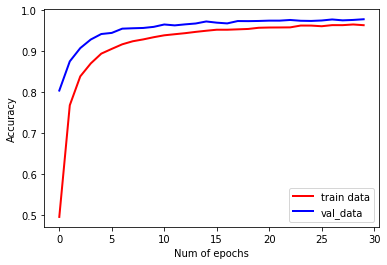

In [69]:
print("Train Accuracy")
print(max(losses.history["accuracy"]))
print("Validation Accuracy")
print(max(losses.history["val_accuracy"]))

%matplotlib inline
plt.plot(losses.history["accuracy"], "r-",label = 'train data', linewidth = 2)
plt.plot(losses.history["val_accuracy"], "b-", label = 'val_data', linewidth = 2)

plt.ylabel("Accuracy")
plt.xlabel("Num of epochs")
plt.legend()

In [70]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
from tqdm import tqdm
from keras.applications.vgg16 import VGG16
import cv2
import math
import os
from glob import glob
from scipy import stats as s

In [71]:
# getting the test list
f = open("../input/video-classification/ucfTrainTestlist/ucfTrainTestlist/testlist01.txt", "r")
temp = f.read()
videos = temp.split('\n')

# creating the dataframe
test = pd.DataFrame()
test['video_name'] = videos
test = test[:-1]
test_videos = test['video_name']
test.head()

,video_name
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02.avi
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c03.avi
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c04.avi
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c05.avi


In [74]:
train = pd.read_csv('./train_new.csv')
y = train['class']
y = pd.get_dummies(y)
y.shape

(73844, 101)

In [ ]:
os.mkdir('./temp')

In [32]:
y1 = pd.get_dummies(y1)
y1.shape

(20000, 101)

In [75]:
y

,ApplyEyeMakeup,ApplyLipstick,Archery,BabyCrawling,BalanceBeam,BandMarching,BaseballPitch,Basketball,BasketballDunk,BenchPress,...,TennisSwing,ThrowDiscus,TrampolineJumping,Typing,UnevenBars,VolleyballSpiking,WalkingWithDog,WallPushups,WritingOnBoard,YoYo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
test_videos.shape

(3783,)

In [77]:
# creating two lists to store predicted and actual tags
predict = []
actual = []

# for loop to extract frames from each test video
for i in tqdm(range(test_videos.shape[0])):
    count = 0
    videoFile = test_videos[i]
    cap = cv2.VideoCapture('../input/video-classification/Videos/Videos/'+videoFile.split(' ')[0].split('/')[1])   # capturing the video from the given path
    frameRate = cap.get(5) #frame rate
    x=1
    # removing all other files from the temp folder
    files = glob('./temp/*')
    for f in files:
        os.remove(f)
    while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
            # storing the frames of this particular video in temp folder
            filename ='./temp/' + "_frame%d.jpg" % count;count+=1
            cv2.imwrite(filename, frame)
    cap.release()
    
    # reading all the frames from temp folder
    images = glob("./temp/*.jpg")
    
    prediction_images = np.zeros((len(images), 512))
    for i in range(len(images)):
        '''img = image.load_img(images[i], target_size=(112,112,1))
        img = image.img_to_array(img)
        img = img/255
        prediction_images.append(img)'''
        image_read = Image.open(images[i])
        image_all2 = img2vec.get_vec(image_read,tensor=True)
        image_all2 = image_all2.flatten().numpy()
        prediction_images[i] = image_all2
        
    # converting all the frames for a test video into numpy array
    #prediction_images = np.array(prediction_images)
    # extracting features using pre-trained model
    #prediction_images = base_model.predict(prediction_images)
    # converting features in one dimensional array
    #prediction_images = prediction_images.reshape(prediction_images.shape[0], 3*3*512)
    # predicting tags for each array
    prediction_x = model.predict(prediction_images)
    classes_x=np.argmax(prediction_x,axis=1)
    # appending the mode of predictions in predict list to assign the tag to the video
    predict.append(y.columns.values[s.mode(classes_x)[0][0]])
    # appending the actual tag of the video
    actual.append(videoFile.split('/')[1].split('_')[1])
        
   

100%|██████████| 3783/3783 [35:01<00:00,  1.80it/s] 


In [110]:
# checking the accuracy of the predicted tags
from sklearn.metrics import accuracy_score
print("Test accuracy: ", accuracy_score(predict, actual)*100)


Test accuracy:  69.7858842188739


In [97]:
from sklearn.metrics import classification_report
print(classification_report(actual, predict, target_names=y.columns.values))

                    precision    recall  f1-score   support

    ApplyEyeMakeup       0.59      0.68      0.63        44
     ApplyLipstick       0.47      0.50      0.48        32
           Archery       0.59      0.63      0.61        41
      BabyCrawling       0.66      0.77      0.71        35
       BalanceBeam       0.63      0.55      0.59        31
      BandMarching       0.78      0.93      0.85        43
     BaseballPitch       0.71      0.81      0.76        43
        Basketball       0.86      0.34      0.49        35
    BasketballDunk       0.80      1.00      0.89        37
        BenchPress       0.80      0.92      0.85        48
            Biking       0.76      0.84      0.80        38
         Billiards       1.00      1.00      1.00        40
       BlowDryHair       0.66      0.66      0.66        38
    BlowingCandles       0.82      0.94      0.87        33
  BodyWeightSquats       0.22      0.20      0.21        30
           Bowling       0.91      0.95

<AxesSubplot:>

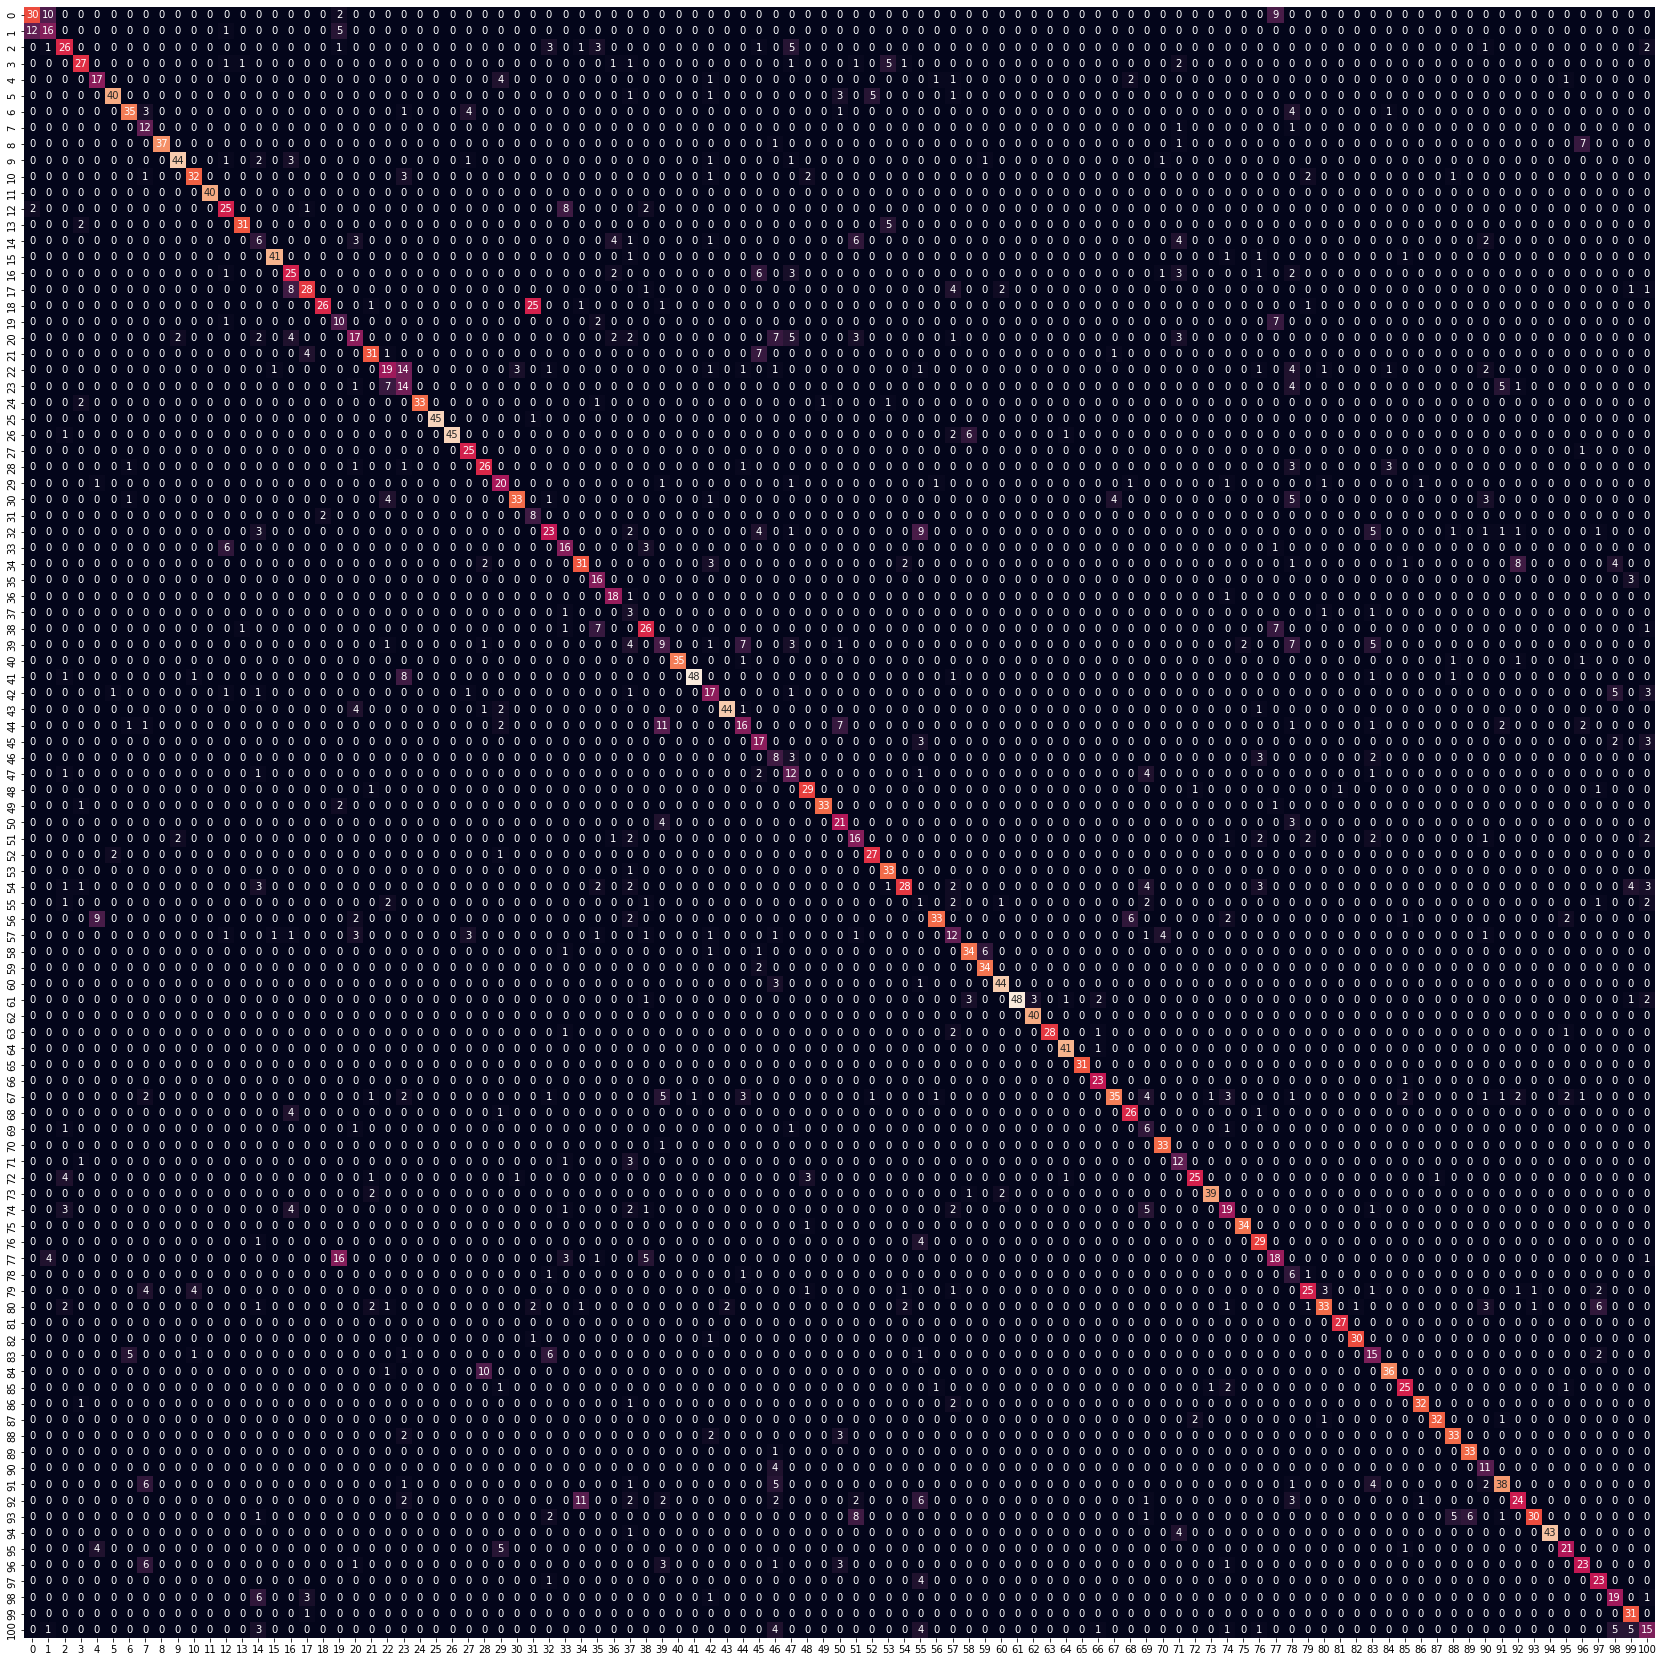

In [109]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat_glove = confusion_matrix(actual, predict)
sns.heatmap(mat_glove.T, square = True, annot = True, cbar = False)